# Supervised Learning Capstone: Mental Health in Tech

### Introduction

This data is extracted from __[Kaggle](https://www.kaggle.com/osmi/mental-health-in-tech-survey)__ It is from a survey that was conducted in 2014. It measures the attitudes towards mental health in the workplace. The survey includes questions about attitudes, health, and benefits availability.

### Research Interest

<b>Objective:</b> To use the variables of this dataset to predict if a person in tech has sought treatment for a mental health condition.

<b>Original Features:</b>
-  <b>Timestamp</b>: Time survey was submitted
-  <b>Age</b>: Age of Responder
-  <b>Gender</b>: Gender of Responder
-  <b>Country</b>: Country of Responder
-  <b>state</b>: State of Responder
-  <b>self_employed</b>: Are they self employed?
-  <b>family_history</b>: Is there a family history of mental health conditions?
-  <b>treatment</b>: Have you sought treatment for a mental health condition?
-  <b>work_interfere</b>: If you have a mental health condition, do you feel that it interferes with your work?
-  <b>no_employees</b>: How many employees does your company or organization have?
-  <b>remote_work</b>: Do you work remotely (outside of an office) at least 50% of the time?
-  <b>tech_company</b>: Is your employer primarily a tech company/organization?
-  <b>benefits</b>: Does your employer provide mental health benefits?
-  <b>care_options</b>: Do you know the options for mental health care your employer provides? 
-  <b>wellness_program</b>: Has your employer ever discussed mental health as part of an employee wellness program?
-  <b>seek_help</b>: Does your employer provide resources to learn more about mental health issues and how to seek help?
-  <b>anonymity</b>: Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?
-  <b>leave</b>: How easy is it for you to take medical leave for a mental health condition?
-  <b>mental_health_consequence</b>: Do you think that discussing a mental health issue with your employer would have negative consequences?
-  <b>phys_health_consequence</b>: Do you think that discussing a physical health issue with your employer would have negative consequences?
-  <b>coworkers</b>: Would you be willing to discuss a mental health issue with your coworkers?
-  <b>supervisor</b>: Would you be willing to discuss a mental health issue with your direct supervisor(s)?
-  <b>mental_health_interview</b>: Would you bring up a mental health issue with a potential employer in an interview?
-  <b>phys_health_interview</b>: Would you bring up a physical health issue with a potential employer in an interview?
-  <b>mental_vs_physical</b>: Do you feel that your employer takes mental health as seriously as physical health?
-  <b>obs_consequence</b>: Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?
-  <b>comments</b>: Any additional notes or comments

### Modules and Data Loading

In [1]:
#Import modules
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import math
from sklearn.model_selection import cross_val_score
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(("https://raw.githubusercontent.com/GenTaylor/SupervisedLearning/master/mentalhealthintechsurvey.csv"))

In [3]:
df.columns

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

### Data Exploration and Cleaning

In [4]:
df.dtypes

Timestamp                    object
Age                           int64
Gender                       object
Country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
comments                     object
dtype: object

There are 27 features and of those features 26 are objects and 1 is an integer.

In [5]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [6]:
#standardize all columns to lowercase for ease of use in querying
df.columns = map(str.lower, df.columns)

#verify
df.columns

Index(['timestamp', 'age', 'gender', 'country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

In [7]:
df.describe(include='all')  

,timestamp,age,gender,country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
count,1259,1.259000e+03,1259,1259,744,1241,1259,1259,995,1259,...,1259,1259,1259,1259,1259,1259,1259,1259,1259,164
unique,1246,NaN,49,48,45,2,2,2,4,6,...,5,3,3,3,3,3,3,3,2,160
top,2014-08-27 12:37:50,NaN,Male,United States,CA,No,No,Yes,Sometimes,6-25,...,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No,* Small family business - YMMV.
freq,2,NaN,615,751,138,1095,767,637,465,290,...,563,490,925,774,516,1008,557,576,1075,5
mean,NaN,7.942815e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,2.818299e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,-1.726000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2.700000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,3.100000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,3.600000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The mean of age seemed odd for something such as a technical professional so I decided to explore its values.

In [8]:
#check values of only int, age

print("Age Values")
print("Average Age: ", df['age'].mean())
print("Minimum Age: ", df['age'].min())
print("Maximum Age: ", df['age'].max())
print("Null values: ", pd.isnull(df['age']).sum())

Age Values
Average Age:  79428148.31135821
Minimum Age:  -1726
Maximum Age:  99999999999
Null values:  0


Age values are obviously off, and the outliers need to be fixed before any machine learning or analysis can be done.

In [9]:
#fix outlier issues for ages
def fixedage(age):
    if age>=1 and age<=99:
        return age
    else:
        return np.nan
df['age'] = df['age'].apply(fixedage)


#check age values again

print("Age Values")
print("Average Age: ", df['age'].mean())
print("Minimum Age: ", df['age'].min())
print("Maximum Age: ", df['age'].max())
print("Null values: ", pd.isnull(df['age']).sum())

Age Values
Average Age:  32.01913875598086
Minimum Age:  5.0
Maximum Age:  72.0
Null values:  5


#### Handling Null Values

In [10]:
#Check Missing Data
df.isnull().sum().sort_values(ascending=False)

comments                     1095
state                         515
work_interfere                264
self_employed                  18
age                             5
benefits                        0
gender                          0
country                         0
family_history                  0
treatment                       0
no_employees                    0
remote_work                     0
tech_company                    0
care_options                    0
obs_consequence                 0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
timestamp                       0
dtype: int64

In [11]:
#fill null values with avg age

df['age'].fillna(df['age'].mean(), inplace = True)


df['age']=df['age'].astype(int)

#check null again
print("Null values: ", pd.isnull(df['age']).sum())

Null values:  0


In [12]:
#drop timestamp, state, and comments

df = df.drop(['comments'], axis=1)
df = df.drop(['timestamp'], axis=1)
df = df.drop(['state'], axis=1)


In [13]:
#Check Missing Data
df.isnull().sum().sort_values(ascending=False)

work_interfere               264
self_employed                 18
obs_consequence                0
mental_vs_physical             0
gender                         0
country                        0
family_history                 0
treatment                      0
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
age                            0
dtype: int64

In [14]:
#Checking the unique values for 'work_interfere'
print("Distinct values for work_interfere:\n", set(df['work_interfere']))

Distinct values for work_interfere:
 {'Sometimes', nan, 'Rarely', 'Never', 'Often'}


In [15]:
#Checking the unique values for 'self_employed'
print("Distinct values for self employed:\n", set(df['self_employed']))

Distinct values for self employed:
 {nan, 'Yes', 'No'}


In [16]:

df['work_interfere'].fillna("Unsure",inplace = True) 
  
df['self_employed'].fillna("No",inplace = True) 
  

In [17]:
#Check Missing Data
df.isnull().sum().sort_values(ascending=False)

obs_consequence              0
mental_vs_physical           0
gender                       0
country                      0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
age                          0
dtype: int64

##### Check Distinct Values

In [18]:
#unique values
df.nunique()

age                          48
gender                       49
country                      48
self_employed                 2
family_history                2
treatment                     2
work_interfere                5
no_employees                  6
remote_work                   2
tech_company                  2
benefits                      3
care_options                  3
wellness_program              3
seek_help                     3
anonymity                     3
leave                         5
mental_health_consequence     3
phys_health_consequence       3
coworkers                     3
supervisor                    3
mental_health_interview       3
phys_health_interview         3
mental_vs_physical            3
obs_consequence               2
dtype: int64

In [19]:
#Gender
print("Distinct values for gender:\n", set(df['gender']))

Distinct values for gender:
 {'Woman', 'female', 'Man', 'Neuter', 'Cis Man', 'Genderqueer', 'Female (trans)', 'F', 'queer', 'Trans-female', 'All', 'Mail', 'Malr', 'Female', 'Female ', 'Guy (-ish) ^_^', 'something kinda male?', 'non-binary', 'male', 'p', 'cis-female/femme', 'Male-ish', 'Female (cis)', 'Femake', 'Agender', 'male leaning androgynous', 'Male', 'M', 'f', 'Cis Male', 'Enby', 'queer/she/they', 'cis male', 'Androgyne', 'maile', 'femail', 'm', 'Trans woman', 'Cis Female', 'ostensibly male, unsure what that really means', 'Male (CIS)', 'msle', 'Make', 'Nah', 'Mal', 'Male ', 'A little about you', 'woman', 'fluid'}


In [20]:
#Age
print("Distinct values for age:\n", set(df['age']))

Distinct values for age:
 {5, 8, 11, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 57, 58, 60, 61, 62, 65, 72}


In [21]:
#Country
print("Distinct values for country:\n", set(df['country']))

Distinct values for country:
 {'United Kingdom', 'Zimbabwe', 'Romania', 'Uruguay', 'Australia', 'Denmark', 'Germany', 'Moldova', 'Nigeria', 'United States', 'South Africa', 'Latvia', 'Portugal', 'Poland', 'Russia', 'Netherlands', 'Mexico', 'Slovenia', 'Canada', 'Greece', 'Bosnia and Herzegovina', 'Colombia', 'Philippines', 'Costa Rica', 'Croatia', 'India', 'Hungary', 'Ireland', 'Italy', 'Singapore', 'Finland', 'Belgium', 'Israel', 'Georgia', 'Thailand', 'Japan', 'Bahamas, The', 'Sweden', 'China', 'Switzerland', 'France', 'New Zealand', 'Norway', 'Spain', 'Austria', 'Czech Republic', 'Brazil', 'Bulgaria'}


Gender as a distinct value seems too varied in spellings and classifications so I assume it would cause a problem. I decided to cleanse this data through strings and grouping of the values into categories.

In [22]:
#create gender groups

male= ["man","msle", "mail", "malr","male", "m", "male-ish", "maile", "mal", "male (cis)", 
       "make", "male ","cis man", "Cis Male", "cis male"]

female=["female ","cis-female/femme", "female (cis)", "femail", "cis female", "f", "female", 
        "woman",  "femake"]

other_or_trans =["something kinda male?", "queer/she/they", "p","a little about you","non-binary","nah", "all", 
        "enby", "fluid", "genderqueer", "androgyne", "agender", "male leaning androgynous", 
        "guy (-ish) ^_^",  "neuter",  "queer", "ostensibly male, unsure what that really means", "trans-female","trans woman","female (trans)"]

for (row, col) in df.iterrows():

    if str.lower(col.gender) in male:
        df['gender'].replace(to_replace=col.gender, value='male', inplace=True)

    if str.lower(col.gender) in female:
        df['gender'].replace(to_replace=col.gender, value='female', inplace=True)
    
    if str.lower(col.gender) in other_or_trans:
        df['gender'].replace(to_replace=col.gender, value='other_or_trans', inplace=True)
    
    
 
#Gender
print("Distinct responses for gender:\n", set(df['gender']))

Distinct responses for gender:
 {'male', 'other_or_trans', 'female'}


In [23]:
print("Distinct values for leave:\n", set(df['leave']))

Distinct values for leave:
 {"Don't know", 'Somewhat easy', 'Very easy', 'Somewhat difficult', 'Very difficult'}


<b>Ages:</b> I want to create a feature that groups the ages. I didn't want to not include certain groups such as those <18 because it is possible for someone in that age group to be working in tech and taking that survey. Their responses to age could have been typos but I did not want to take the risk of completely deleting them and changing things.

In [24]:
#Group the ages into groups
df['age'] = pd.cut(df['age'],
                         [0,18, 25, 35, 45, 55, 65, 99],
                         labels=['<18','18-24','25-34','35-44','45-54', '55-64', '65+'])

In [25]:
df.columns

Index(['age', 'gender', 'country', 'self_employed', 'family_history',
       'treatment', 'work_interfere', 'no_employees', 'remote_work',
       'tech_company', 'benefits', 'care_options', 'wellness_program',
       'seek_help', 'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

### Visualizations

First, I would like to look at the responses for each question and their relation to treatment.

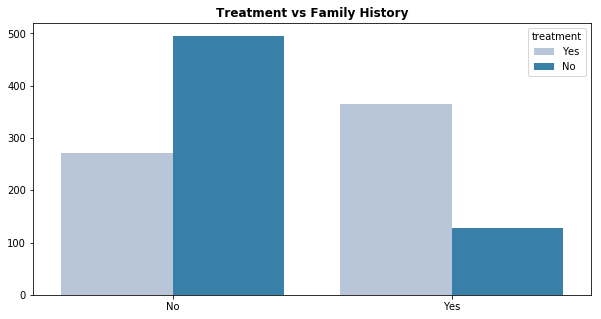

In [26]:
plt.figure(figsize=(10,5))
sns.countplot("family_history", hue="treatment", palette="PuBu",data=df)
plt.title("Treatment vs Family History",fontsize=12,fontweight="bold")
plt.xlabel("")
plt.ylabel("")
plt.show()

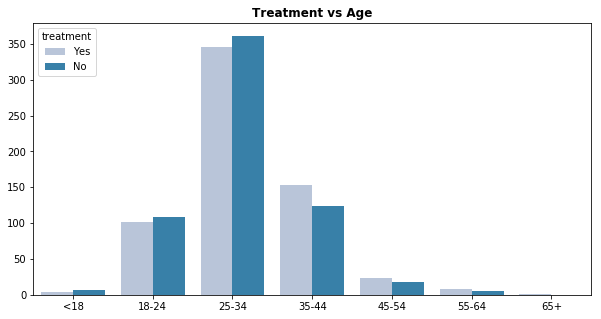

In [27]:
plt.figure(figsize=(10,5))
sns.countplot("age", hue="treatment", palette="PuBu",data=df)
plt.title("Treatment vs Age",fontsize=12,fontweight="bold")
plt.xlabel("")
plt.ylabel("")
plt.show()

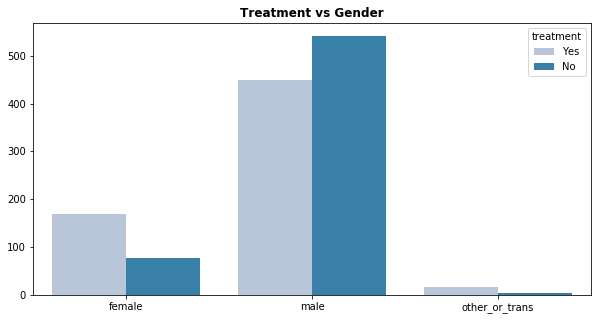

In [28]:
plt.figure(figsize=(10,5))
sns.countplot("gender", hue="treatment", palette="PuBu",data=df)
plt.title("Treatment vs Gender",fontsize=12,fontweight="bold")
plt.xlabel("")
plt.ylabel("")
plt.show()

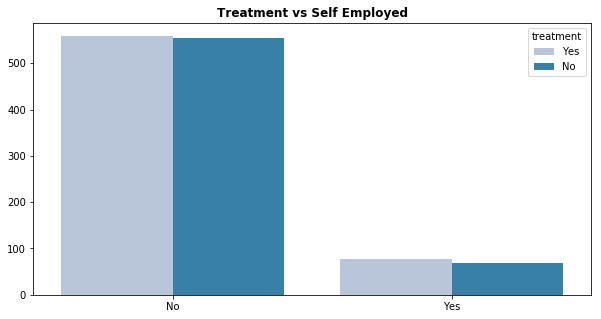

In [29]:
plt.figure(figsize=(10,5))
sns.countplot("self_employed", hue="treatment", palette="PuBu",data=df)
plt.title("Treatment vs Self Employed",fontsize=12,fontweight="bold")
plt.xlabel("")
plt.ylabel("")
plt.show()

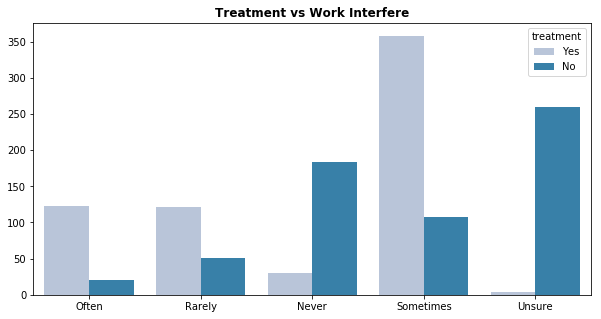

In [30]:
plt.figure(figsize=(10,5))
sns.countplot("work_interfere", hue="treatment", palette="PuBu",data=df)
plt.title("Treatment vs Work Interfere",fontsize=12,fontweight="bold")
plt.xlabel("")
plt.ylabel("")
plt.show()

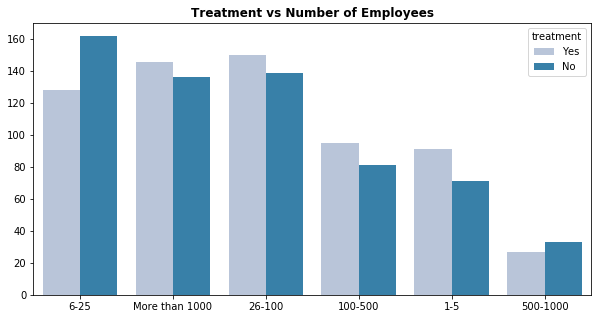

In [31]:
plt.figure(figsize=(10,5))
sns.countplot("no_employees", hue="treatment", palette="PuBu",data=df)
plt.title("Treatment vs Number of Employees",fontsize=12,fontweight="bold")
plt.xlabel("")
plt.ylabel("")
plt.show()

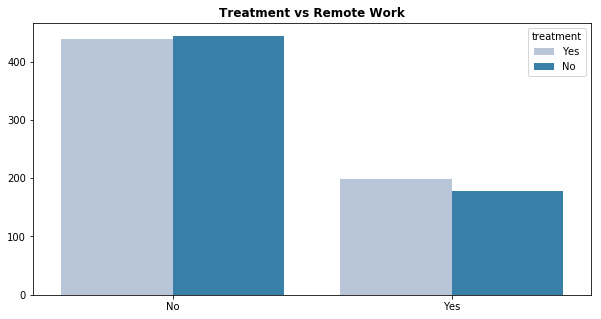

In [32]:
plt.figure(figsize=(10,5))
sns.countplot("remote_work", hue="treatment", palette="PuBu",data=df)
plt.title("Treatment vs Remote Work",fontsize=12,fontweight="bold")
plt.xlabel("")
plt.ylabel("")
plt.show()

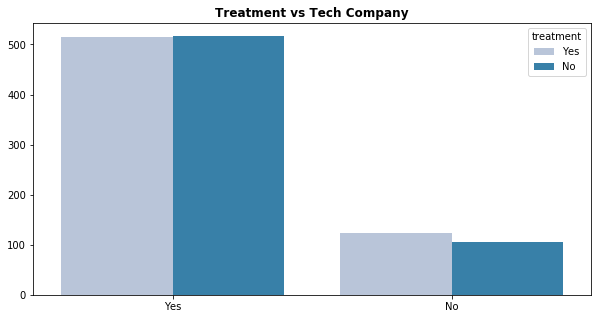

In [33]:
plt.figure(figsize=(10,5))
sns.countplot("tech_company", hue="treatment", palette="PuBu",data=df)
plt.title("Treatment vs Tech Company",fontsize=12,fontweight="bold")
plt.xlabel("")
plt.ylabel("")
plt.show()

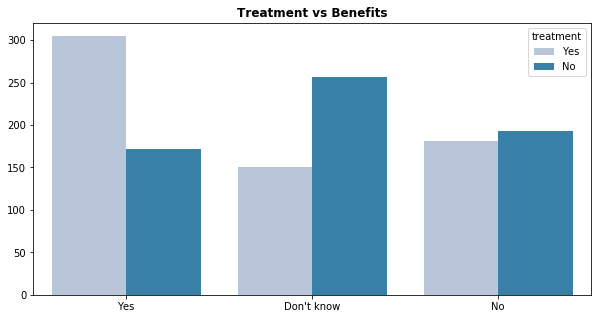

In [34]:
plt.figure(figsize=(10,5))
sns.countplot("benefits", hue="treatment", palette="PuBu",data=df)
plt.title("Treatment vs Benefits",fontsize=12,fontweight="bold")
plt.xlabel("")
plt.ylabel("")
plt.show()

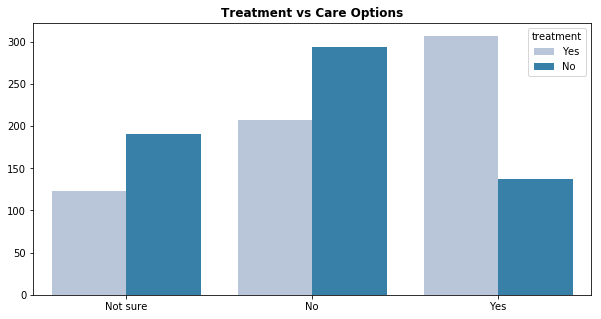

In [35]:
plt.figure(figsize=(10,5))
sns.countplot("care_options", hue="treatment", palette="PuBu",data=df)
plt.title("Treatment vs Care Options",fontsize=12,fontweight="bold")
plt.xlabel("")
plt.ylabel("")
plt.show()

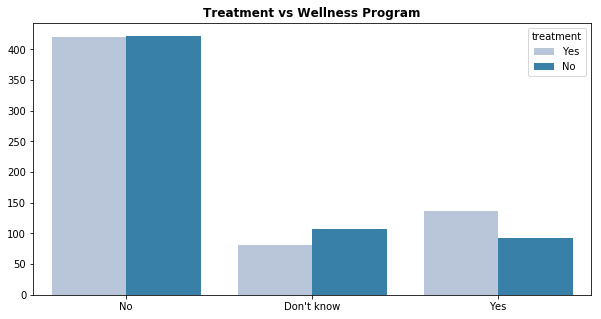

In [36]:
plt.figure(figsize=(10,5))
sns.countplot("wellness_program", hue="treatment", palette="PuBu",data=df)
plt.title("Treatment vs Wellness Program",fontsize=12,fontweight="bold")
plt.xlabel("")
plt.ylabel("")
plt.show()

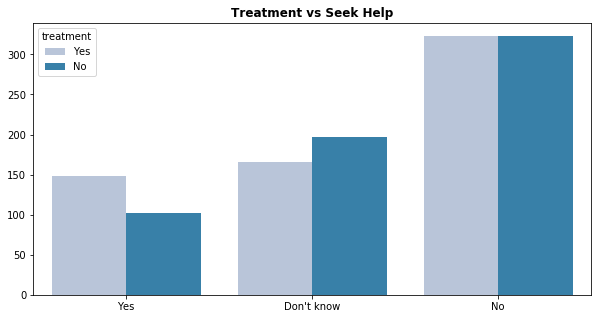

In [37]:
plt.figure(figsize=(10,5))
sns.countplot("seek_help", hue="treatment", palette="PuBu",data=df)
plt.title("Treatment vs Seek Help",fontsize=12,fontweight="bold")
plt.xlabel("")
plt.ylabel("")
plt.show()

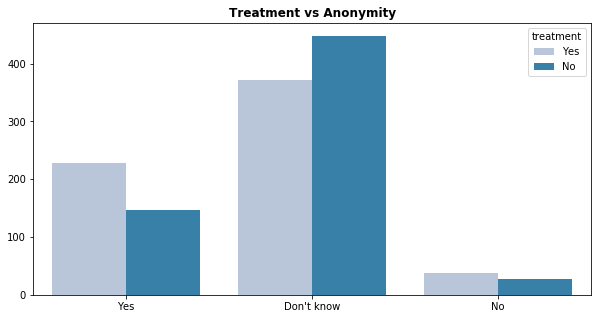

In [38]:
plt.figure(figsize=(10,5))
sns.countplot("anonymity", hue="treatment", palette="PuBu",data=df)
plt.title("Treatment vs Anonymity",fontsize=12,fontweight="bold")
plt.xlabel("")
plt.ylabel("")
plt.show()

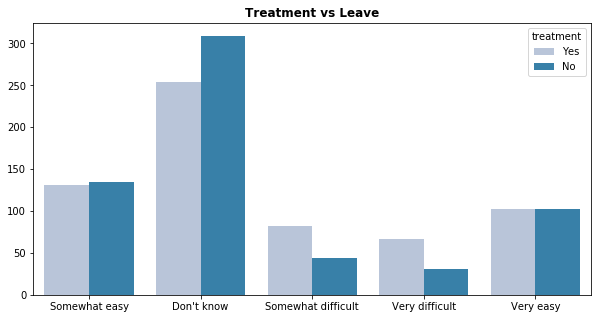

In [39]:
plt.figure(figsize=(10,5))
sns.countplot("leave", hue="treatment", palette="PuBu",data=df)
plt.title("Treatment vs Leave",fontsize=12,fontweight="bold")
plt.xlabel("")
plt.ylabel("")
plt.show()

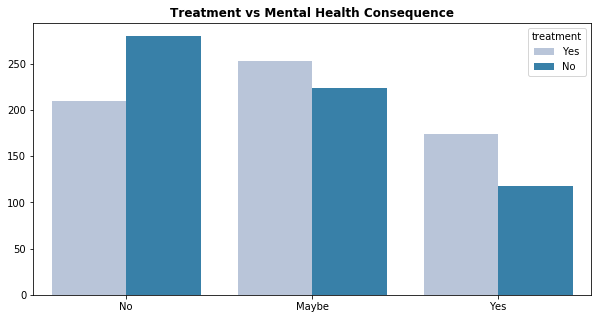

In [40]:
plt.figure(figsize=(10,5))
sns.countplot("mental_health_consequence", hue="treatment", palette="PuBu",data=df)
plt.title("Treatment vs Mental Health Consequence",fontsize=12,fontweight="bold")
plt.xlabel("")
plt.ylabel("")
plt.show()

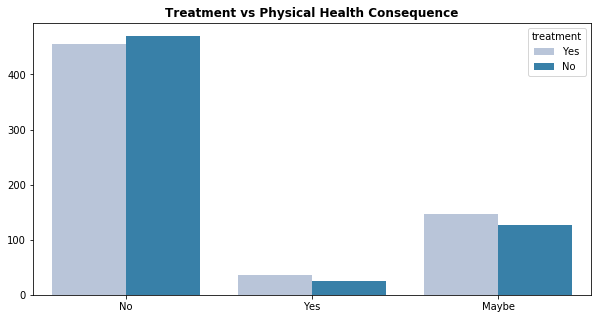

In [41]:
plt.figure(figsize=(10,5))
sns.countplot("phys_health_consequence", hue="treatment", palette="PuBu",data=df)
plt.title("Treatment vs Physical Health Consequence",fontsize=12,fontweight="bold")
plt.xlabel("")
plt.ylabel("")
plt.show()

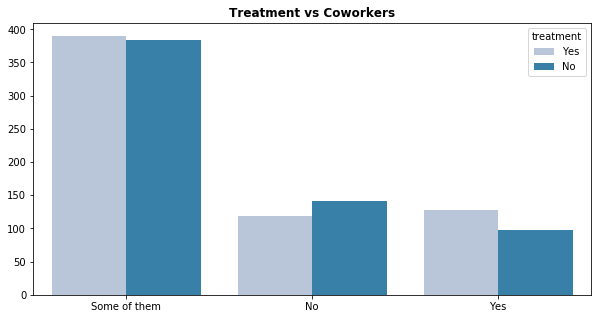

In [42]:
plt.figure(figsize=(10,5))
sns.countplot("coworkers", hue="treatment", palette="PuBu",data=df)
plt.title("Treatment vs Coworkers",fontsize=12,fontweight="bold")
plt.xlabel("")
plt.ylabel("")
plt.show()

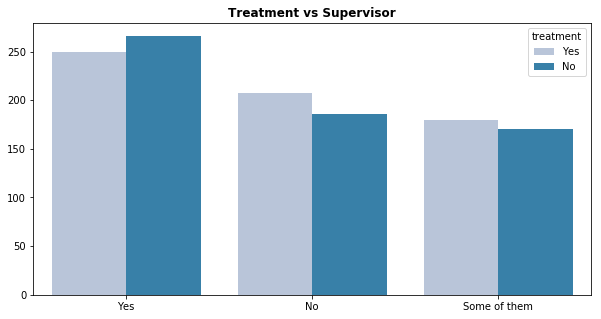

In [43]:
plt.figure(figsize=(10,5))
sns.countplot("supervisor", hue="treatment", palette="PuBu",data=df)
plt.title("Treatment vs Supervisor",fontsize=12,fontweight="bold")
plt.xlabel("")
plt.ylabel("")
plt.show()

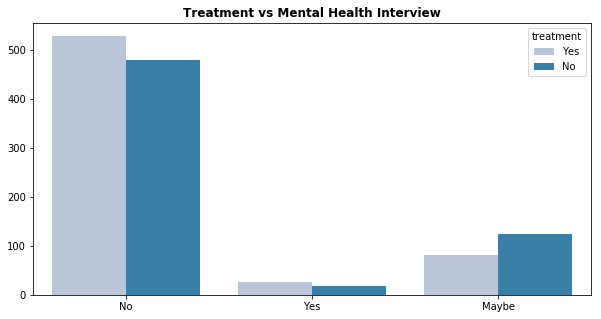

In [44]:
plt.figure(figsize=(10,5))
sns.countplot("mental_health_interview", hue="treatment", palette="PuBu",data=df)
plt.title("Treatment vs Mental Health Interview",fontsize=12,fontweight="bold")
plt.xlabel("")
plt.ylabel("")
plt.show()

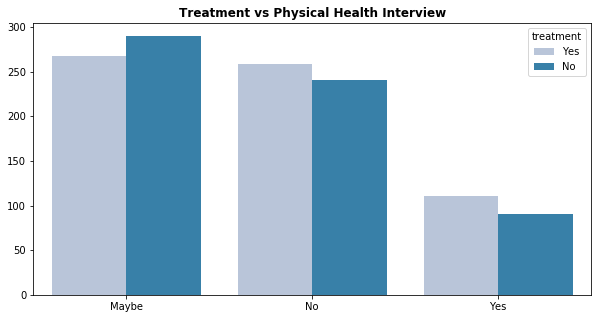

In [45]:
plt.figure(figsize=(10,5))
sns.countplot("phys_health_interview", hue="treatment", palette="PuBu",data=df)
plt.title("Treatment vs Physical Health Interview",fontsize=12,fontweight="bold")
plt.xlabel("")
plt.ylabel("")
plt.show()

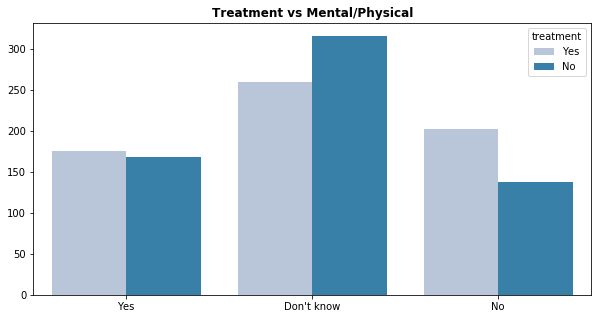

In [46]:
plt.figure(figsize=(10,5))
sns.countplot("mental_vs_physical", hue="treatment", palette="PuBu",data=df)
plt.title("Treatment vs Mental/Physical",fontsize=12,fontweight="bold")
plt.xlabel("")
plt.ylabel("")
plt.show()

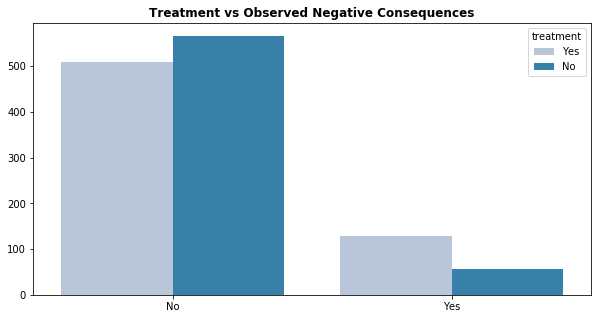

In [47]:
plt.figure(figsize=(10,5))
sns.countplot("obs_consequence", hue="treatment", palette="PuBu",data=df)
plt.title("Treatment vs Observed Negative Consequences",fontsize=12,fontweight="bold")
plt.xlabel("")
plt.ylabel("")
plt.show()

#### Label Encoding

In [48]:
from sklearn.preprocessing import LabelEncoder

age= LabelEncoder()
gender= LabelEncoder()
country= LabelEncoder()
state= LabelEncoder()
self_employed= LabelEncoder()
family_history= LabelEncoder()     
treatment=LabelEncoder() 
work_interfere= LabelEncoder()
no_employees= LabelEncoder()
remote_work= LabelEncoder()     
tech_company= LabelEncoder()
benefits= LabelEncoder()
care_options= LabelEncoder()
wellness_program= LabelEncoder()     
seek_help= LabelEncoder()
anonymity=LabelEncoder() 
leave= LabelEncoder()
mental_health_consequence=LabelEncoder()
phys_health_consequence= LabelEncoder()
coworkers=LabelEncoder()
supervisor=LabelEncoder()
mental_health_interview= LabelEncoder()
phys_health_interview=LabelEncoder()
mental_vs_physical= LabelEncoder()
obs_consequence=LabelEncoder()


df['age']=gender.fit_transform(df['age'])
df['gender']=gender.fit_transform(df['gender']) 
df['country']=country.fit_transform(df['country']) 

df['self_employed']=self_employed.fit_transform(df['self_employed'])  
df['family_history']=family_history.fit_transform(df['family_history'])       
df['treatment']=treatment.fit_transform(df['treatment'])  
df['work_interfere']=work_interfere.fit_transform(df['work_interfere'])  
df['no_employees']=no_employees.fit_transform(df['no_employees'])  
df['remote_work']=remote_work.fit_transform(df['remote_work'])       
df['tech_company']=tech_company.fit_transform(df['tech_company'])  
df['benefits']=benefits.fit_transform(df['benefits'])  
df['care_options']=care_options.fit_transform(df['care_options'])  
df['wellness_program']=wellness_program.fit_transform(df['wellness_program'])       
df['seek_help']=seek_help.fit_transform(df['seek_help'])  
df['anonymity']=anonymity.fit_transform(df['anonymity'])  
df['leave']=leave.fit_transform(df['leave'])  
df['mental_health_consequence']=mental_health_consequence.fit_transform(df['mental_health_consequence']) 
df['phys_health_consequence']=phys_health_consequence.fit_transform(df['phys_health_consequence'])  
df['coworkers']=coworkers.fit_transform(df['coworkers'])  
df['supervisor']=supervisor.fit_transform(df['supervisor']) 
df['mental_health_interview']=mental_health_interview.fit_transform(df['mental_health_interview'])  
df['phys_health_interview']=phys_health_interview.fit_transform(df['phys_health_interview']) 
df['mental_vs_physical']=mental_vs_physical.fit_transform(df['mental_vs_physical'])  
df['obs_consequence']=obs_consequence.fit_transform(df['obs_consequence']) 



In [49]:
df.describe()

,age,gender,country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,...,1259.000000,1259.000000,1259.000000,1259.000000,1259.00000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000
mean,1.193805,0.820492,37.792693,0.115965,0.390786,0.505957,2.335981,2.783161,0.298650,0.818904,...,0.647339,1.410643,0.853058,0.831612,0.97220,1.097697,0.870532,0.718030,0.814932,0.146148
std,0.887428,0.425192,13.320224,0.320310,0.488121,0.500163,1.373980,1.740247,0.457848,0.385251,...,0.908106,1.508507,0.767905,0.486954,0.62029,0.844407,0.427490,0.723718,0.834414,0.353395
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,42.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,45.000000,0.000000,0.000000,1.000000,3.000000,3.000000,0.000000,1.000000,...,0.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,2.000000,1.000000,45.000000,0.000000,1.000000,1.000000,3.000000,4.000000,1.000000,1.000000,...,2.000000,2.000000,1.000000,1.000000,1.00000,2.000000,1.000000,1.000000,2.000000,0.000000
max,6.000000,2.000000,47.000000,1.000000,1.000000,1.000000,4.000000,5.000000,1.000000,1.000000,...,2.000000,4.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,1.000000


In [50]:
df['age'].value_counts()

1    706
2    277
0    210
3     42
4     13
6     10
5      1
Name: age, dtype: int64

In [51]:
df['country'].value_counts()

45    751
44    185
7      72
17     45
21     27
28     27
0      21
15     13
20     10
29      8
33      7
23      7
41      7
42      7
3       6
5       6
39      6
22      5
37      4
6       4
36      3
1       3
14      3
26      3
18      2
11      2
34      2
13      2
9       2
10      1
8       1
12      1
4       1
2       1
43      1
35      1
16      1
19      1
40      1
46      1
24      1
25      1
27      1
38      1
30      1
31      1
32      1
47      1
Name: country, dtype: int64

Looking the distribution of country, I've decided to drop it as well, considering most of the countries do not have many participants, it really does not have much of an effect on the modeling. 

In [52]:
df = df.drop(['country'], axis=1)

#### Check Correlations

Text(0.5, 1.0, 'Mental Health in Tech Survey Correlations')

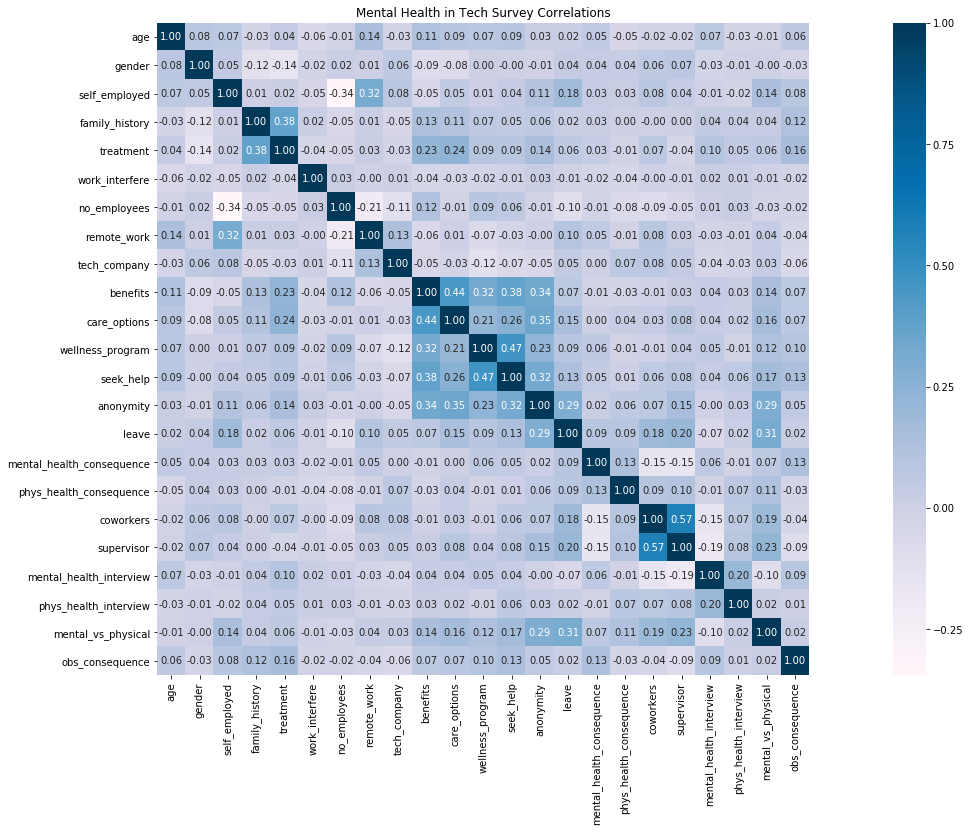

In [53]:
#Correlations

plt.figure(figsize=(30,12))
sns.heatmap(df.corr(),cmap = 'PuBu',annot=True, square=True, fmt='.2f', annot_kws={'size': 10})
plt.title('Mental Health in Tech Survey Correlations')

In [54]:
corr=df.corr()['treatment']
corr[np.argsort(corr,axis=0)[::-1]]

treatment                    1.000000
family_history               0.377918
care_options                 0.236578
benefits                     0.226140
obs_consequence              0.156972
anonymity                    0.142889
mental_health_interview      0.098413
wellness_program             0.094713
seek_help                    0.089935
coworkers                    0.068433
mental_vs_physical           0.062642
leave                        0.061549
phys_health_interview        0.051859
age                          0.042170
mental_health_consequence    0.030221
remote_work                  0.026937
self_employed                0.020493
phys_health_consequence     -0.008933
tech_company                -0.031525
work_interfere              -0.035881
supervisor                  -0.036199
no_employees                -0.050114
gender                      -0.144482
Name: treatment, dtype: float64

From the correlation commands executed I see where there may be strong correlations, and I have an idea of which columns and values would be of high importance.

#### A specified research question your model addresses

My model will address the question of whether the survey takers' answers to any of the questions can be used to predict whether they have sought treatment for mental health conditions. I will test multiple models and compare them against each other and determine which best predicts the answers to my question.


#### Setup for Modeling

From the visualizations above, I noticed the biggest difference in the features that I decided to use for X in relation to y. 

In [55]:
#Setup X and y
X= df[['family_history','age','benefits','gender',
       'care_options', 'work_interfere', 'leave', 'anonymity' ]]
y=df['treatment']


In [56]:
#train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)


### Modeling

#### How you chose your model specification and what alternatives you compared it to?

I wanted to look at four models and compare how they worked with this data. I decided to use the first model that I learned that could be applied for categorical features, logistic regression, and three other models (Random Forest, Support Vector Machines, and Gradient Boost) that I was familiar with, and thought would preform well. 

Initially I wanted to test these models in their vanilla state (but with the same random_state) before I added any parameters, just to see how they performed with default settings. 



#### Logistic Regression

In [57]:
import timeit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

%timeit pass

lr = LogisticRegression(random_state = 42)
lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
#print confusion matrix and accuracy score
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)

print("\n")
print("Logistic Regression Accuracy Score:",lr_acc_score*100)
print("Logistic Regression F1 Score:",f1_score(y_test, lr_predict, average="macro")*100)
print("Logistic Regression Precision Score:",precision_score(y_test,lr_predict, average="macro")*100)
print("Logistic Regression Recall Score:",recall_score(y_test, lr_predict, average="macro")*100) 
print("Logistic Regression Cross Validation Scores:", cross_val_score(lr, X_train, y_train, cv=3)*100)
print("\n")

print("Logistic Regression Confusion Matrix:\n",lr_conf_matrix)

9.37 ns ± 0.219 ns per loop (mean ± std. dev. of 7 runs, 100000000 loops each)


Logistic Regression Accuracy Score: 69.31216931216932
Logistic Regression F1 Score: 69.31131019036954
Logistic Regression Precision Score: 69.39890710382514
Logistic Regression Recall Score: 69.41414028101075
Logistic Regression Cross Validation Scores: [64.96598639 69.3877551  73.37883959]


Logistic Regression Confusion Matrix:
 [[130  51]
 [ 65 132]]


#### Random Forest

In [58]:
#random forest
from sklearn.ensemble import RandomForestClassifier

#decided to time the modeling 
%timeit pass

rfc = RandomForestClassifier(random_state = 42)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)
#Check accuracy

print('\n')
print("Random Forest Classifier Accuracy Score:",accuracy_score(y_test,pred_rfc )*100)
print("Random Forest Classifier F1 Score:",f1_score(y_test,pred_rfc, average="macro")*100)
print("Random Forest Classifier Precision Score:",precision_score(y_test,pred_rfc, average="macro")*100)
print("Random Forest Classifier Recall Score:",recall_score(y_test, pred_rfc, average="macro")*100) 
print("Random Forest Classifier Cross Validation Scores:", cross_val_score(rfc, X_train, y_train, cv=3)*100)
print("\n")
print("Random Forest Classifier Confusion Matrix:\n", confusion_matrix(y_test,pred_rfc))



9.2 ns ± 0.261 ns per loop (mean ± std. dev. of 7 runs, 100000000 loops each)


Random Forest Classifier Accuracy Score: 79.1005291005291
Random Forest Classifier F1 Score: 79.03582485625829
Random Forest Classifier Precision Score: 79.09259675967597
Random Forest Classifier Recall Score: 79.00692711108618
Random Forest Classifier Cross Validation Scores: [76.19047619 79.59183673 77.81569966]


Random Forest Classifier Confusion Matrix:
 [[139  42]
 [ 37 160]]


<b>Support Vector

In [59]:
#Support vector
from sklearn.svm import SVC

%timeit pass

svc = SVC(random_state = 42)
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

print('\n')
print("Support Vector Classifier Accuracy Score:",accuracy_score(y_test,pred_svc )*100)
print("Support Vector Classifier F1 Score:",f1_score(y_test, pred_svc, average="macro")*100)
print("Support Vector Classifier Precision Score:",precision_score(y_test,pred_svc, average="macro")*100)
print("Support Vector Classifier Recall Score:",recall_score(y_test, pred_svc, average="macro")*100) 
print("Support Vector Cross Validation Scores:", cross_val_score(svc, X_train, y_train, cv=3)*100)
print("\n")
print("Support Vector Confusion Matrix:\n", confusion_matrix(y_test,pred_svc))

9.05 ns ± 0.372 ns per loop (mean ± std. dev. of 7 runs, 100000000 loops each)


Support Vector Classifier Accuracy Score: 82.53968253968253
Support Vector Classifier F1 Score: 82.14786615908636
Support Vector Classifier Precision Score: 84.20863632282969
Support Vector Classifier Recall Score: 82.05962363631265
Support Vector Cross Validation Scores: [81.63265306 82.99319728 82.59385666]


Support Vector Confusion Matrix:
 [[128  53]
 [ 13 184]]


<b>Gradient Boosting Classifier

In [60]:
from sklearn import ensemble


%timeit pass

gbc = ensemble.GradientBoostingClassifier(random_state = 42)
gbc.fit(X_train, y_train)
pred_gbc = gbc.predict(X_test)
#Check accuracy

print('\n')
print("Gradient Boosting Classifier Accuracy Score:",accuracy_score(y_test,pred_gbc )*100)
print("Gradient Boosting Classifier F1 Score:",f1_score(y_test, pred_gbc, average="macro")*100)
print("Gradient Boosting Classifier Precision Score:",precision_score(y_test,pred_gbc, average="macro")*100)
print("Gradient Boosting Classifier Recall Score:",recall_score(y_test, pred_gbc, average="macro")*100) 
print("Gradient Boosting Classifier Cross Validation Scores:", cross_val_score(gbc, X_train, y_train, cv=3)*100)
print("\n")
print("Gradient Boosting Classifier Confusion Matrix:\n", confusion_matrix(y_test,pred_gbc))


9.12 ns ± 0.217 ns per loop (mean ± std. dev. of 7 runs, 100000000 loops each)


Gradient Boosting Classifier Accuracy Score: 82.27513227513228
Gradient Boosting Classifier F1 Score: 82.02031819053096
Gradient Boosting Classifier Precision Score: 83.13053097345133
Gradient Boosting Classifier Recall Score: 81.917996466332
Gradient Boosting Classifier Cross Validation Scores: [83.33333333 82.99319728 82.25255973]


Gradient Boosting Classifier Confusion Matrix:
 [[133  48]
 [ 19 178]]


<b> Looking at the initial scores of these models, I thought that I could improve the accuracies so I decided to explore Parameter Tuning. 

### Model Tuning

<b>Logistic Regression Tuning

In [61]:
# Logistic Regression 
%timeit pass

print('\n')

log_reg_params = {"penalty": ['l1', 'l2'], 
                  'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 
                  'random_state':[42]}

grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params,  cv=3, verbose=0)
grid_log_reg.fit(X_train, y_train)
# logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

9.41 ns ± 0.666 ns per loop (mean ± std. dev. of 7 runs, 100000000 loops each)




<b>Gradient Boosting Classifier Tuning

In [62]:
%timeit pass
print('\n')
gbcparam= {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001], 
           'n_estimators':[100,250,500,],
           'max_depth': [4, 6, 8],
           'min_samples_leaf': [20, 50,100,150],
           'max_features': [1.0, 0.3, 0.1],
          'random_state':[42]}

gbctuning = GridSearchCV(estimator = ensemble.GradientBoostingClassifier(max_depth=4, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10), 
            param_grid = gbcparam, scoring='accuracy',n_jobs=4,iid=False, cv=3)


gbctuning.fit(X_train,y_train)


9.05 ns ± 0.3 ns per loop (mean ± std. dev. of 7 runs, 100000000 loops each)




GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=4,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sam...        subsample=1, tol=0.0001, validation_fraction=0.1, verbose=0,
              warm_start=False),
       fit_params=None, iid=False, n_jobs=4,
       param_grid={'learning_rate': [0.15, 0.1, 0.05, 0.01, 0.005, 0.001], 'n_estimators': [100, 250, 500], 'max_depth': [4, 6, 8], 'min_samples_leaf': [20, 50, 100, 150], 'max_features': [1.0, 0.3, 0.1], 'random_state': [42]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

<b>SVC Tuning

In [63]:
#SVC Tuning
%timeit pass
print('\n')
svc_params =  {'C':[1,10,100,1000],
               'gamma':['scale',1,0.1,0.001,0.0001], 
               'kernel':['linear','rbf'], 
               'random_state':[42]}

grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)

## SVC best parameters
svc_best = grid_svc.best_estimator_

26.7 ns ± 0.89 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)




<b>Random Forest GridSearchCV

In [75]:
#random forest
%timeit pass
print('\n')
param_grid = {
    'n_estimators': [100, 200, 300],
    'criterion': ['entropy', 'gini'],
    'max_depth': [10, 50, 100],
    'min_samples_split': [2, 4, 6, 8],
    'max_features': ['log2', 'sqrt','auto'],
    'random_state':[42]}

grid_rfc = GridSearchCV(rfc, param_grid = param_grid, cv = 3, verbose = 5)
grid_rfc.fit(X_train,y_train)

rfcbest_estimator = grid_rfc.best_estimator_

10.5 ns ± 0.872 ns per loop (mean ± std. dev. of 7 runs, 100000000 loops each)


Fitting 3 folds for each of 216 candidates, totalling 648 fits
[CV] criterion=entropy, max_depth=10, max_features=log2, min_samples_split=2, n_estimators=100, random_state=42 
[CV]  criterion=entropy, max_depth=10, max_features=log2, min_samples_split=2, n_estimators=100, random_state=42, score=0.782312925170068, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=log2, min_samples_split=2, n_estimators=100, random_state=42 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  criterion=entropy, max_depth=10, max_features=log2, min_samples_split=2, n_estimators=100, random_state=42, score=0.8231292517006803, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=log2, min_samples_split=2, n_estimators=100, random_state=42 
[CV]  criterion=entropy, max_depth=10, max_features=log2, min_samples_split=2, n_estimators=100, random_state=42, score=0.8122866894197952, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=log2, min_samples_split=2, n_estimators=200, random_state=42 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s


[CV]  criterion=entropy, max_depth=10, max_features=log2, min_samples_split=2, n_estimators=200, random_state=42, score=0.7789115646258503, total=   0.1s
[CV] criterion=entropy, max_depth=10, max_features=log2, min_samples_split=2, n_estimators=200, random_state=42 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.5s remaining:    0.0s


[CV]  criterion=entropy, max_depth=10, max_features=log2, min_samples_split=2, n_estimators=200, random_state=42, score=0.826530612244898, total=   0.1s
[CV] criterion=entropy, max_depth=10, max_features=log2, min_samples_split=2, n_estimators=200, random_state=42 
[CV]  criterion=entropy, max_depth=10, max_features=log2, min_samples_split=2, n_estimators=200, random_state=42, score=0.8088737201365188, total=   0.1s
[CV] criterion=entropy, max_depth=10, max_features=log2, min_samples_split=2, n_estimators=300, random_state=42 
[CV]  criterion=entropy, max_depth=10, max_features=log2, min_samples_split=2, n_estimators=300, random_state=42, score=0.7721088435374149, total=   0.2s
[CV] criterion=entropy, max_depth=10, max_features=log2, min_samples_split=2, n_estimators=300, random_state=42 
[CV]  criterion=entropy, max_depth=10, max_features=log2, min_samples_split=2, n_estimators=300, random_state=42, score=0.8197278911564626, total=   0.2s
[CV] criterion=entropy, max_depth=10, max_feat

[CV]  criterion=entropy, max_depth=10, max_features=log2, min_samples_split=8, n_estimators=300, random_state=42, score=0.8361774744027304, total=   0.2s
[CV] criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=100, random_state=42 
[CV]  criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=100, random_state=42, score=0.7585034013605442, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=100, random_state=42 
[CV]  criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=100, random_state=42, score=0.8095238095238095, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=100, random_state=42 
[CV]  criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=100, random_state=42, score=0.8156996587030717, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_fea

[CV]  criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=8, n_estimators=200, random_state=42, score=0.7959183673469388, total=   0.2s
[CV] criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=8, n_estimators=200, random_state=42 
[CV]  criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=8, n_estimators=200, random_state=42, score=0.8197278911564626, total=   0.1s
[CV] criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=8, n_estimators=200, random_state=42 
[CV]  criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=8, n_estimators=200, random_state=42, score=0.8225255972696246, total=   0.1s
[CV] criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=8, n_estimators=300, random_state=42 
[CV]  criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=8, n_estimators=300, random_state=42, score=0.7959183673469388, total=   0.3s
[CV] criterion=entropy, max_depth=10, max_fea

[CV]  criterion=entropy, max_depth=10, max_features=auto, min_samples_split=6, n_estimators=300, random_state=42, score=0.8231292517006803, total=   0.2s
[CV] criterion=entropy, max_depth=10, max_features=auto, min_samples_split=6, n_estimators=300, random_state=42 
[CV]  criterion=entropy, max_depth=10, max_features=auto, min_samples_split=6, n_estimators=300, random_state=42, score=0.825938566552901, total=   0.3s
[CV] criterion=entropy, max_depth=10, max_features=auto, min_samples_split=8, n_estimators=100, random_state=42 
[CV]  criterion=entropy, max_depth=10, max_features=auto, min_samples_split=8, n_estimators=100, random_state=42, score=0.7925170068027211, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=auto, min_samples_split=8, n_estimators=100, random_state=42 
[CV]  criterion=entropy, max_depth=10, max_features=auto, min_samples_split=8, n_estimators=100, random_state=42, score=0.8197278911564626, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_feat

[CV]  criterion=entropy, max_depth=50, max_features=log2, min_samples_split=6, n_estimators=200, random_state=42, score=0.826530612244898, total=   0.1s
[CV] criterion=entropy, max_depth=50, max_features=log2, min_samples_split=6, n_estimators=200, random_state=42 
[CV]  criterion=entropy, max_depth=50, max_features=log2, min_samples_split=6, n_estimators=200, random_state=42, score=0.8333333333333334, total=   0.1s
[CV] criterion=entropy, max_depth=50, max_features=log2, min_samples_split=6, n_estimators=200, random_state=42 
[CV]  criterion=entropy, max_depth=50, max_features=log2, min_samples_split=6, n_estimators=200, random_state=42, score=0.8293515358361775, total=   0.1s
[CV] criterion=entropy, max_depth=50, max_features=log2, min_samples_split=6, n_estimators=300, random_state=42 
[CV]  criterion=entropy, max_depth=50, max_features=log2, min_samples_split=6, n_estimators=300, random_state=42, score=0.8197278911564626, total=   0.2s
[CV] criterion=entropy, max_depth=50, max_feat

[CV]  criterion=entropy, max_depth=50, max_features=sqrt, min_samples_split=4, n_estimators=300, random_state=42, score=0.8299319727891157, total=   0.2s
[CV] criterion=entropy, max_depth=50, max_features=sqrt, min_samples_split=4, n_estimators=300, random_state=42 
[CV]  criterion=entropy, max_depth=50, max_features=sqrt, min_samples_split=4, n_estimators=300, random_state=42, score=0.8156996587030717, total=   0.2s
[CV] criterion=entropy, max_depth=50, max_features=sqrt, min_samples_split=6, n_estimators=100, random_state=42 
[CV]  criterion=entropy, max_depth=50, max_features=sqrt, min_samples_split=6, n_estimators=100, random_state=42, score=0.8095238095238095, total=   0.0s
[CV] criterion=entropy, max_depth=50, max_features=sqrt, min_samples_split=6, n_estimators=100, random_state=42 
[CV]  criterion=entropy, max_depth=50, max_features=sqrt, min_samples_split=6, n_estimators=100, random_state=42, score=0.8231292517006803, total=   0.0s
[CV] criterion=entropy, max_depth=50, max_fea

[CV]  criterion=entropy, max_depth=50, max_features=auto, min_samples_split=4, n_estimators=200, random_state=42, score=0.7755102040816326, total=   0.1s
[CV] criterion=entropy, max_depth=50, max_features=auto, min_samples_split=4, n_estimators=200, random_state=42 
[CV]  criterion=entropy, max_depth=50, max_features=auto, min_samples_split=4, n_estimators=200, random_state=42, score=0.8231292517006803, total=   0.1s
[CV] criterion=entropy, max_depth=50, max_features=auto, min_samples_split=4, n_estimators=200, random_state=42 
[CV]  criterion=entropy, max_depth=50, max_features=auto, min_samples_split=4, n_estimators=200, random_state=42, score=0.8225255972696246, total=   0.1s
[CV] criterion=entropy, max_depth=50, max_features=auto, min_samples_split=4, n_estimators=300, random_state=42 
[CV]  criterion=entropy, max_depth=50, max_features=auto, min_samples_split=4, n_estimators=300, random_state=42, score=0.7789115646258503, total=   0.2s
[CV] criterion=entropy, max_depth=50, max_fea

[CV]  criterion=entropy, max_depth=100, max_features=log2, min_samples_split=2, n_estimators=300, random_state=42, score=0.8129251700680272, total=   0.2s
[CV] criterion=entropy, max_depth=100, max_features=log2, min_samples_split=2, n_estimators=300, random_state=42 
[CV]  criterion=entropy, max_depth=100, max_features=log2, min_samples_split=2, n_estimators=300, random_state=42, score=0.8088737201365188, total=   0.2s
[CV] criterion=entropy, max_depth=100, max_features=log2, min_samples_split=4, n_estimators=100, random_state=42 
[CV]  criterion=entropy, max_depth=100, max_features=log2, min_samples_split=4, n_estimators=100, random_state=42, score=0.8095238095238095, total=   0.0s
[CV] criterion=entropy, max_depth=100, max_features=log2, min_samples_split=4, n_estimators=100, random_state=42 
[CV]  criterion=entropy, max_depth=100, max_features=log2, min_samples_split=4, n_estimators=100, random_state=42, score=0.8163265306122449, total=   0.0s
[CV] criterion=entropy, max_depth=100,

[CV]  criterion=entropy, max_depth=100, max_features=sqrt, min_samples_split=2, n_estimators=200, random_state=42, score=0.7517006802721088, total=   0.1s
[CV] criterion=entropy, max_depth=100, max_features=sqrt, min_samples_split=2, n_estimators=200, random_state=42 
[CV]  criterion=entropy, max_depth=100, max_features=sqrt, min_samples_split=2, n_estimators=200, random_state=42, score=0.8095238095238095, total=   0.1s
[CV] criterion=entropy, max_depth=100, max_features=sqrt, min_samples_split=2, n_estimators=200, random_state=42 
[CV]  criterion=entropy, max_depth=100, max_features=sqrt, min_samples_split=2, n_estimators=200, random_state=42, score=0.8020477815699659, total=   0.1s
[CV] criterion=entropy, max_depth=100, max_features=sqrt, min_samples_split=2, n_estimators=300, random_state=42 
[CV]  criterion=entropy, max_depth=100, max_features=sqrt, min_samples_split=2, n_estimators=300, random_state=42, score=0.7585034013605442, total=   0.2s
[CV] criterion=entropy, max_depth=100,

[CV]  criterion=entropy, max_depth=100, max_features=sqrt, min_samples_split=8, n_estimators=300, random_state=42, score=0.8299319727891157, total=   0.2s
[CV] criterion=entropy, max_depth=100, max_features=sqrt, min_samples_split=8, n_estimators=300, random_state=42 
[CV]  criterion=entropy, max_depth=100, max_features=sqrt, min_samples_split=8, n_estimators=300, random_state=42, score=0.8191126279863481, total=   0.2s
[CV] criterion=entropy, max_depth=100, max_features=auto, min_samples_split=2, n_estimators=100, random_state=42 
[CV]  criterion=entropy, max_depth=100, max_features=auto, min_samples_split=2, n_estimators=100, random_state=42, score=0.7517006802721088, total=   0.0s
[CV] criterion=entropy, max_depth=100, max_features=auto, min_samples_split=2, n_estimators=100, random_state=42 
[CV]  criterion=entropy, max_depth=100, max_features=auto, min_samples_split=2, n_estimators=100, random_state=42, score=0.8027210884353742, total=   0.0s
[CV] criterion=entropy, max_depth=100,

[CV]  criterion=entropy, max_depth=100, max_features=auto, min_samples_split=8, n_estimators=200, random_state=42, score=0.7925170068027211, total=   0.1s
[CV] criterion=entropy, max_depth=100, max_features=auto, min_samples_split=8, n_estimators=200, random_state=42 
[CV]  criterion=entropy, max_depth=100, max_features=auto, min_samples_split=8, n_estimators=200, random_state=42, score=0.8299319727891157, total=   0.1s
[CV] criterion=entropy, max_depth=100, max_features=auto, min_samples_split=8, n_estimators=200, random_state=42 
[CV]  criterion=entropy, max_depth=100, max_features=auto, min_samples_split=8, n_estimators=200, random_state=42, score=0.8191126279863481, total=   0.1s
[CV] criterion=entropy, max_depth=100, max_features=auto, min_samples_split=8, n_estimators=300, random_state=42 
[CV]  criterion=entropy, max_depth=100, max_features=auto, min_samples_split=8, n_estimators=300, random_state=42, score=0.7891156462585034, total=   0.2s
[CV] criterion=entropy, max_depth=100,

[CV]  criterion=gini, max_depth=10, max_features=log2, min_samples_split=6, n_estimators=300, random_state=42, score=0.8361774744027304, total=   0.2s
[CV] criterion=gini, max_depth=10, max_features=log2, min_samples_split=8, n_estimators=100, random_state=42 
[CV]  criterion=gini, max_depth=10, max_features=log2, min_samples_split=8, n_estimators=100, random_state=42, score=0.8299319727891157, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=log2, min_samples_split=8, n_estimators=100, random_state=42 
[CV]  criterion=gini, max_depth=10, max_features=log2, min_samples_split=8, n_estimators=100, random_state=42, score=0.826530612244898, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=log2, min_samples_split=8, n_estimators=100, random_state=42 
[CV]  criterion=gini, max_depth=10, max_features=log2, min_samples_split=8, n_estimators=100, random_state=42, score=0.8361774744027304, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=log2, min_samples_s

[CV]  criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=6, n_estimators=200, random_state=42, score=0.8197278911564626, total=   0.1s
[CV] criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=6, n_estimators=200, random_state=42 
[CV]  criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=6, n_estimators=200, random_state=42, score=0.8156996587030717, total=   0.1s
[CV] criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=6, n_estimators=300, random_state=42 
[CV]  criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=6, n_estimators=300, random_state=42, score=0.7891156462585034, total=   0.2s
[CV] criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=6, n_estimators=300, random_state=42 
[CV]  criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=6, n_estimators=300, random_state=42, score=0.8197278911564626, total=   0.2s
[CV] criterion=gini, max_depth=10, max_features=sqrt, min_samples_

[CV]  criterion=gini, max_depth=10, max_features=auto, min_samples_split=6, n_estimators=100, random_state=42, score=0.8095238095238095, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=auto, min_samples_split=6, n_estimators=100, random_state=42 
[CV]  criterion=gini, max_depth=10, max_features=auto, min_samples_split=6, n_estimators=100, random_state=42, score=0.8191126279863481, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=auto, min_samples_split=6, n_estimators=200, random_state=42 
[CV]  criterion=gini, max_depth=10, max_features=auto, min_samples_split=6, n_estimators=200, random_state=42, score=0.7925170068027211, total=   0.1s
[CV] criterion=gini, max_depth=10, max_features=auto, min_samples_split=6, n_estimators=200, random_state=42 
[CV]  criterion=gini, max_depth=10, max_features=auto, min_samples_split=6, n_estimators=200, random_state=42, score=0.8197278911564626, total=   0.2s
[CV] criterion=gini, max_depth=10, max_features=auto, min_samples_

[CV]  criterion=gini, max_depth=50, max_features=log2, min_samples_split=4, n_estimators=300, random_state=42, score=0.8095238095238095, total=   0.2s
[CV] criterion=gini, max_depth=50, max_features=log2, min_samples_split=4, n_estimators=300, random_state=42 
[CV]  criterion=gini, max_depth=50, max_features=log2, min_samples_split=4, n_estimators=300, random_state=42, score=0.8197278911564626, total=   0.2s
[CV] criterion=gini, max_depth=50, max_features=log2, min_samples_split=4, n_estimators=300, random_state=42 
[CV]  criterion=gini, max_depth=50, max_features=log2, min_samples_split=4, n_estimators=300, random_state=42, score=0.8156996587030717, total=   0.2s
[CV] criterion=gini, max_depth=50, max_features=log2, min_samples_split=6, n_estimators=100, random_state=42 
[CV]  criterion=gini, max_depth=50, max_features=log2, min_samples_split=6, n_estimators=100, random_state=42, score=0.8231292517006803, total=   0.0s
[CV] criterion=gini, max_depth=50, max_features=log2, min_samples_

[CV]  criterion=gini, max_depth=50, max_features=sqrt, min_samples_split=4, n_estimators=200, random_state=42, score=0.7755102040816326, total=   0.1s
[CV] criterion=gini, max_depth=50, max_features=sqrt, min_samples_split=4, n_estimators=200, random_state=42 
[CV]  criterion=gini, max_depth=50, max_features=sqrt, min_samples_split=4, n_estimators=200, random_state=42, score=0.8197278911564626, total=   0.1s
[CV] criterion=gini, max_depth=50, max_features=sqrt, min_samples_split=4, n_estimators=200, random_state=42 
[CV]  criterion=gini, max_depth=50, max_features=sqrt, min_samples_split=4, n_estimators=200, random_state=42, score=0.8122866894197952, total=   0.1s
[CV] criterion=gini, max_depth=50, max_features=sqrt, min_samples_split=4, n_estimators=300, random_state=42 
[CV]  criterion=gini, max_depth=50, max_features=sqrt, min_samples_split=4, n_estimators=300, random_state=42, score=0.7789115646258503, total=   0.2s
[CV] criterion=gini, max_depth=50, max_features=sqrt, min_samples_

[CV]  criterion=gini, max_depth=50, max_features=auto, min_samples_split=2, n_estimators=300, random_state=42, score=0.7952218430034129, total=   0.2s
[CV] criterion=gini, max_depth=50, max_features=auto, min_samples_split=4, n_estimators=100, random_state=42 
[CV]  criterion=gini, max_depth=50, max_features=auto, min_samples_split=4, n_estimators=100, random_state=42, score=0.7721088435374149, total=   0.0s
[CV] criterion=gini, max_depth=50, max_features=auto, min_samples_split=4, n_estimators=100, random_state=42 
[CV]  criterion=gini, max_depth=50, max_features=auto, min_samples_split=4, n_estimators=100, random_state=42, score=0.8027210884353742, total=   0.0s
[CV] criterion=gini, max_depth=50, max_features=auto, min_samples_split=4, n_estimators=100, random_state=42 
[CV]  criterion=gini, max_depth=50, max_features=auto, min_samples_split=4, n_estimators=100, random_state=42, score=0.8088737201365188, total=   0.0s
[CV] criterion=gini, max_depth=50, max_features=auto, min_samples_

[CV]  criterion=gini, max_depth=100, max_features=log2, min_samples_split=2, n_estimators=200, random_state=42, score=0.8129251700680272, total=   0.2s
[CV] criterion=gini, max_depth=100, max_features=log2, min_samples_split=2, n_estimators=200, random_state=42 
[CV]  criterion=gini, max_depth=100, max_features=log2, min_samples_split=2, n_estimators=200, random_state=42, score=0.8191126279863481, total=   0.1s
[CV] criterion=gini, max_depth=100, max_features=log2, min_samples_split=2, n_estimators=300, random_state=42 
[CV]  criterion=gini, max_depth=100, max_features=log2, min_samples_split=2, n_estimators=300, random_state=42, score=0.7755102040816326, total=   0.3s
[CV] criterion=gini, max_depth=100, max_features=log2, min_samples_split=2, n_estimators=300, random_state=42 
[CV]  criterion=gini, max_depth=100, max_features=log2, min_samples_split=2, n_estimators=300, random_state=42, score=0.8095238095238095, total=   0.3s
[CV] criterion=gini, max_depth=100, max_features=log2, min_

[CV]  criterion=gini, max_depth=100, max_features=sqrt, min_samples_split=2, n_estimators=100, random_state=42, score=0.8095238095238095, total=   0.0s
[CV] criterion=gini, max_depth=100, max_features=sqrt, min_samples_split=2, n_estimators=100, random_state=42 
[CV]  criterion=gini, max_depth=100, max_features=sqrt, min_samples_split=2, n_estimators=100, random_state=42, score=0.7952218430034129, total=   0.0s
[CV] criterion=gini, max_depth=100, max_features=sqrt, min_samples_split=2, n_estimators=200, random_state=42 
[CV]  criterion=gini, max_depth=100, max_features=sqrt, min_samples_split=2, n_estimators=200, random_state=42, score=0.7619047619047619, total=   0.2s
[CV] criterion=gini, max_depth=100, max_features=sqrt, min_samples_split=2, n_estimators=200, random_state=42 
[CV]  criterion=gini, max_depth=100, max_features=sqrt, min_samples_split=2, n_estimators=200, random_state=42, score=0.8095238095238095, total=   0.1s
[CV] criterion=gini, max_depth=100, max_features=sqrt, min_

[CV]  criterion=gini, max_depth=100, max_features=sqrt, min_samples_split=8, n_estimators=300, random_state=42, score=0.7857142857142857, total=   0.2s
[CV] criterion=gini, max_depth=100, max_features=sqrt, min_samples_split=8, n_estimators=300, random_state=42 
[CV]  criterion=gini, max_depth=100, max_features=sqrt, min_samples_split=8, n_estimators=300, random_state=42, score=0.8299319727891157, total=   0.2s
[CV] criterion=gini, max_depth=100, max_features=sqrt, min_samples_split=8, n_estimators=300, random_state=42 
[CV]  criterion=gini, max_depth=100, max_features=sqrt, min_samples_split=8, n_estimators=300, random_state=42, score=0.825938566552901, total=   0.2s
[CV] criterion=gini, max_depth=100, max_features=auto, min_samples_split=2, n_estimators=100, random_state=42 
[CV]  criterion=gini, max_depth=100, max_features=auto, min_samples_split=2, n_estimators=100, random_state=42, score=0.7721088435374149, total=   0.0s
[CV] criterion=gini, max_depth=100, max_features=auto, min_s

[CV]  criterion=gini, max_depth=100, max_features=auto, min_samples_split=8, n_estimators=200, random_state=42, score=0.7925170068027211, total=   0.1s
[CV] criterion=gini, max_depth=100, max_features=auto, min_samples_split=8, n_estimators=200, random_state=42 
[CV]  criterion=gini, max_depth=100, max_features=auto, min_samples_split=8, n_estimators=200, random_state=42, score=0.8333333333333334, total=   0.1s
[CV] criterion=gini, max_depth=100, max_features=auto, min_samples_split=8, n_estimators=200, random_state=42 
[CV]  criterion=gini, max_depth=100, max_features=auto, min_samples_split=8, n_estimators=200, random_state=42, score=0.8156996587030717, total=   0.1s
[CV] criterion=gini, max_depth=100, max_features=auto, min_samples_split=8, n_estimators=300, random_state=42 
[CV]  criterion=gini, max_depth=100, max_features=auto, min_samples_split=8, n_estimators=300, random_state=42, score=0.7857142857142857, total=   0.2s
[CV] criterion=gini, max_depth=100, max_features=auto, min_

[Parallel(n_jobs=1)]: Done 648 out of 648 | elapsed:  2.5min finished


In [65]:
%timeit pass

print('\n')
print('Best Parameters:')
print('\n')
print("Logistic Regression:\n",grid_log_reg.best_params_)
print('\n')
print("Support Vector Classifier:\n",grid_svc.best_params_)
print('\n')
print("Random Forest:\n",grid_rfc.best_params_)
print('\n')
print("Gradient Boost:\n",gbctuning.best_params_)

9.43 ns ± 0.32 ns per loop (mean ± std. dev. of 7 runs, 100000000 loops each)


Best Parameters:


Logistic Regression:
 {'C': 0.1, 'penalty': 'l1', 'random_state': 42}


Support Vector Classifier:
 {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf', 'random_state': 42}


Random Forest:
 {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'min_samples_split': 8, 'n_estimators': 200, 'random_state': 42}


Gradient Boost:
 {'learning_rate': 0.05, 'max_depth': 6, 'max_features': 1.0, 'min_samples_leaf': 20, 'n_estimators': 100, 'random_state': 42}


### Re-Modeling

<b>Logistic Regression

In [66]:
#Logistic Regression
%timeit pass

bestlr = LogisticRegression(C= 1, 
                            penalty= 'l1', 
                            random_state=42)
bestlr.fit(X_train, y_train)
bestlr_predict = bestlr.predict(X_test)
#print confusion matrix and accuracy score
bestlr_conf_matrix = confusion_matrix(y_test, bestlr_predict)
bestlr_acc_score = accuracy_score(y_test, bestlr_predict)

print('\n')
print("Logistic Regression Accuracy Score:",bestlr_acc_score*100)
print("Logistic Regression F1 Score:",f1_score(y_test, bestlr_predict, average="macro")*100)
print("Logistic Regression Precision Score:",precision_score(y_test,bestlr_predict, average="macro")*100)
print("Logistic Regression Recall Score:",recall_score(y_test, bestlr_predict, average="macro")*100) 
print("Logistic Regression Cross Validation Scores:", cross_val_score(bestlr, X_train, y_train, cv=3)*100)
print("\n")

print("Logistic Regression Confusion Matrix:\n",bestlr_conf_matrix)


9.35 ns ± 1.07 ns per loop (mean ± std. dev. of 7 runs, 100000000 loops each)


Logistic Regression Accuracy Score: 70.1058201058201
Logistic Regression F1 Score: 70.10393700787402
Logistic Regression Precision Score: 70.17593007619902
Logistic Regression Recall Score: 70.19799758813137
Logistic Regression Cross Validation Scores: [66.66666667 69.3877551  74.06143345]


Logistic Regression Confusion Matrix:
 [[131  50]
 [ 63 134]]


<b>Random Forest

In [67]:
#random forest
from sklearn.ensemble import RandomForestClassifier

%timeit pass

bestrfc = RandomForestClassifier(criterion= 'entropy', 
                                 max_depth= 10, 
                                 max_features= 'log2', 
                                 min_samples_split= 8, 
                                 n_estimators= 300,
                                random_state=42)
bestrfc.fit(X_train, y_train)
bestpred_rfc = bestrfc.predict(X_test)
#Check accuracy

print('\n')
print("Random Forest Classifier Accuracy Score:",accuracy_score(y_test,bestpred_rfc )*100)
print("Random Forest Classifier F1 Score:",f1_score(y_test, bestpred_rfc, average="macro")*100)
print("Random Forest Classifier Precision Score:",precision_score(y_test,bestpred_rfc, average="macro")*100)
print("Random Forest Classifier Recall Score:",recall_score(y_test, bestpred_rfc, average="macro")*100) 
print("Random Forest Classifier Cross Validation Scores:", cross_val_score(bestrfc, X_train, y_train, cv=3)*100)
print("\n")
print("Random Forest Classifier Confusion Matrix:\n", confusion_matrix(y_test,bestpred_rfc))


9.01 ns ± 0.393 ns per loop (mean ± std. dev. of 7 runs, 100000000 loops each)


Random Forest Classifier Accuracy Score: 82.53968253968253
Random Forest Classifier F1 Score: 82.29985526577177
Random Forest Classifier Precision Score: 83.34640522875817
Random Forest Classifier Recall Score: 82.19423956025464
Random Forest Classifier Cross Validation Scores: [82.99319728 83.33333333 83.61774744]


Random Forest Classifier Confusion Matrix:
 [[134  47]
 [ 19 178]]


<b>Support Vector

In [68]:

#Support vector
%timeit pass

bestsvc = SVC(C=1000, 
              gamma=0.001, 
              kernel='rbf',
             random_state=42)
bestsvc.fit(X_train, y_train)
bestpred_svc = svc.predict(X_test)

print('\n')
print("Support Vector Classifier Accuracy Score:",accuracy_score(y_test,bestpred_svc )*100)
print("Support Vector Classifier F1 Score:",f1_score(y_test, bestpred_svc, average="macro")*100)
print("Support Vector Classifier Precision Score:",precision_score(y_test,bestpred_svc, average="macro")*100)
print("Support Vector Classifier Recall Score:",recall_score(y_test, bestpred_svc, average="macro")*100) 
print("Support Vector Cross Validation Scores:", cross_val_score(bestsvc, X_train, y_train, cv=3)*100)
print("\n")
print("Support Vector Confusion Matrix:\n", confusion_matrix(y_test,bestpred_svc))


9.82 ns ± 1.15 ns per loop (mean ± std. dev. of 7 runs, 100000000 loops each)


Support Vector Classifier Accuracy Score: 82.53968253968253
Support Vector Classifier F1 Score: 82.14786615908636
Support Vector Classifier Precision Score: 84.20863632282969
Support Vector Classifier Recall Score: 82.05962363631265
Support Vector Cross Validation Scores: [82.31292517 83.67346939 82.93515358]


Support Vector Confusion Matrix:
 [[128  53]
 [ 13 184]]


<b>Gradient Boost Classifier

In [69]:
%timeit pass

bestgbc = ensemble.GradientBoostingClassifier(learning_rate= 0.1, 
                                              max_depth= 6, max_features= 1.0, 
                                              min_samples_leaf= 100, n_estimators= 100, random_state=42)
bestgbc.fit(X_train, y_train)
bestpred_gbc = bestgbc.predict(X_test)
#Check accuracy
print('\n')
print("Gradient Boosting Classifier Accuracy Score:",accuracy_score(y_test,bestpred_gbc )*100)
print("Gradient Boosting Classifier F1 Score:",f1_score(y_test, bestpred_gbc, average="macro")*100)
print("Gradient Boosting Classifier Precision Score:",precision_score(y_test,bestpred_gbc, average="macro")*100)
print("Gradient Boosting Classifier Recall Score:",recall_score(y_test, bestpred_gbc, average="macro")*100) 
print("Gradient Boosting Classifier Cross Validation Scores:", cross_val_score(bestgbc, X_train, y_train, cv=3)*100)
print("\n")
print("Gradient Boosting Classifier Confusion Matrix:\n", confusion_matrix(y_test,bestpred_gbc))



8.75 ns ± 0.395 ns per loop (mean ± std. dev. of 7 runs, 100000000 loops each)


Gradient Boosting Classifier Accuracy Score: 83.33333333333334
Gradient Boosting Classifier F1 Score: 83.09373202990224
Gradient Boosting Classifier Precision Score: 84.23090358639963
Gradient Boosting Classifier Recall Score: 82.97809686737527
Gradient Boosting Classifier Cross Validation Scores: [82.99319728 85.03401361 83.95904437]


Gradient Boosting Classifier Confusion Matrix:
 [[135  46]
 [ 17 180]]


#### Imbalance Check

In [70]:
print("Gradient Boost:", np.unique( bestpred_gbc) )
print("Random Forest:", np.unique( bestpred_rfc) )
print("Support Vector:",np.unique(bestpred_svc))
print( "Logistic Regression:",np.unique( bestlr_predict) )

Gradient Boost: [0 1]
Random Forest: [0 1]
Support Vector: [0 1]
Logistic Regression: [0 1]


### Scores:
I wanted to put all of the scores in one spot for easier viewing.

#### Vanilla Scores

In [71]:
print("Vanilla Scores")
print('\n')

print("Logistic Regression Scores")
print("Logistic Regression Accuracy Score:",lr_acc_score*100)
print("Logistic Regression F1 Score:",f1_score(y_test, lr_predict, average="macro")*100)
print("Logistic Regression Precision Score:",precision_score(y_test,lr_predict, average="macro")*100)
print("Logistic Regression Recall Score:",recall_score(y_test, lr_predict, average="macro")*100) 
print("Logistic Regression Cross Validation Scores:", cross_val_score(lr, X_train, y_train, cv=3)*100)
print("Logistic Regression Confusion Matrix:\n",lr_conf_matrix)


print('\n')
print("Random Forest Classifier Scores")
print("Random Forest Classifier Accuracy Score:",accuracy_score(y_test,pred_rfc )*100)
print("Random Forest Classifier F1 Score:",f1_score(y_test,pred_rfc, average="macro")*100)
print("Random Forest Classifier Precision Score:",precision_score(y_test,pred_rfc, average="macro")*100)
print("Random Forest Classifier Recall Score:",recall_score(y_test, pred_rfc, average="macro")*100) 
print("Random Forest Classifier Cross Validation Scores:", cross_val_score(rfc, X_train, y_train, cv=3)*100)
print("Random Forest Classifier Confusion Matrix:\n", confusion_matrix(y_test,pred_rfc))


print('\n')
print("Support Vector Classifier Scores")
print("Support Vector Classifier Accuracy Score:",accuracy_score(y_test,pred_svc )*100)
print("Support Vector Classifier F1 Score:",f1_score(y_test, pred_svc, average="macro")*100)
print("Support Vector Classifier Precision Score:",precision_score(y_test,pred_svc, average="macro")*100)
print("Support Vector Classifier Recall Score:",recall_score(y_test, pred_svc, average="macro")*100) 
print("Support Vector Cross Validation Scores:", cross_val_score(svc, X_train, y_train, cv=3)*100)
print("Support Vector Confusion Matrix:\n", confusion_matrix(y_test,pred_svc))


print('\n')
print("Gradient Boost Classifier Scores")
print("Gradient Boosting Classifier Accuracy Score:",accuracy_score(y_test,pred_gbc )*100)
print("Gradient Boosting Classifier F1 Score:",f1_score(y_test, pred_gbc, average="macro")*100)
print("Gradient Boosting Classifier Precision Score:",precision_score(y_test,pred_gbc, average="macro")*100)
print("Gradient Boosting Classifier Recall Score:",recall_score(y_test, pred_gbc, average="macro")*100) 
print("Gradient Boosting Classifier Cross Validation Scores:", cross_val_score(gbc, X_train, y_train, cv=3)*100)
print("Gradient Boosting Classifier Confusion Matrix:\n", confusion_matrix(y_test,pred_gbc))



Vanilla Scores


Logistic Regression Scores
Logistic Regression Accuracy Score: 69.31216931216932
Logistic Regression F1 Score: 69.31131019036954
Logistic Regression Precision Score: 69.39890710382514
Logistic Regression Recall Score: 69.41414028101075
Logistic Regression Cross Validation Scores: [64.96598639 69.3877551  73.37883959]
Logistic Regression Confusion Matrix:
 [[130  51]
 [ 65 132]]


Random Forest Classifier Scores
Random Forest Classifier Accuracy Score: 79.1005291005291
Random Forest Classifier F1 Score: 79.03582485625829
Random Forest Classifier Precision Score: 79.09259675967597
Random Forest Classifier Recall Score: 79.00692711108618
Random Forest Classifier Cross Validation Scores: [76.19047619 79.59183673 77.81569966]
Random Forest Classifier Confusion Matrix:
 [[139  42]
 [ 37 160]]


Support Vector Classifier Scores
Support Vector Classifier Accuracy Score: 82.53968253968253
Support Vector Classifier F1 Score: 82.14786615908636
Support Vector Classifier Precision 

#### Scores with Best Parameters


In [72]:
print("Scores with Best Parameters")
print('\n')

print("Logistic Regression Scores")
print("Logistic Regression Accuracy Score:",bestlr_acc_score*100)
print("Logistic Regression F1 Score:",f1_score(y_test, bestlr_predict, average="macro")*100)
print("Logistic Regression Precision Score:",precision_score(y_test,bestlr_predict, average="macro")*100)
print("Logistic Regression Recall Score:",recall_score(y_test, bestlr_predict, average="macro")*100) 
print("Logistic Regression Cross Validation Scores:", cross_val_score(bestlr, X_train, y_train, cv=3)*100)
print("Logistic Regression Confusion Matrix:\n", bestlr_conf_matrix)

print('\n')
print("Random Forest Classifier Scores")
print("Random Forest Classifier Accuracy Score:",accuracy_score(y_test,bestpred_rfc )*100)
print("Random Forest Classifier F1 Score:",f1_score(y_test, bestpred_rfc, average="macro")*100)
print("Random Forest Classifier Precision Score:",precision_score(y_test,bestpred_rfc, average="macro")*100)
print("Random Forest Classifier Recall Score:",recall_score(y_test, bestpred_rfc, average="macro")*100) 
print("Random Forest Classifier Cross Validation Scores:", cross_val_score(bestrfc, X_train, y_train, cv=3)*100)
print("Random Forest Classifier Confusion Matrix:\n", confusion_matrix(y_test,bestpred_rfc))


print('\n')
print("Support Vector Classifier Scores")
print("Support Vector Classifier Accuracy Score:",accuracy_score(y_test,bestpred_svc )*100)
print("Support Vector Classifier F1 Score:",f1_score(y_test, bestpred_svc, average="macro")*100)
print("Support Vector Classifier Precision Score:",precision_score(y_test,bestpred_svc, average="macro")*100)
print("Support Vector Classifier Recall Score:",recall_score(y_test, bestpred_svc, average="macro")*100) 
print("Support Vector Cross Validation Scores:", cross_val_score(bestsvc, X_train, y_train, cv=3)*100)
print("Support Vector Confusion Matrix:\n", confusion_matrix(y_test,bestpred_svc))



print('\n')
print("Gradient Boost Classifier Scores")
print("Gradient Boosting Classifier Accuracy Score:",accuracy_score(y_test,bestpred_gbc )*100)
print("Gradient Boosting Classifier F1 Score:",f1_score(y_test, bestpred_gbc, average="macro")*100)
print("Gradient Boosting Classifier Precision Score:",precision_score(y_test,bestpred_gbc, average="macro")*100)
print("Gradient Boosting Classifier Recall Score:",recall_score(y_test, bestpred_gbc, average="macro")*100) 
print("Gradient Boosting Classifier Cross Validation Scores:", cross_val_score(bestgbc, X_train, y_train, cv=3)*100)
print("Gradient Boosting Classifier Confusion Matrix:\n", confusion_matrix(y_test,bestpred_gbc))


Scores with Best Parameters


Logistic Regression Scores
Logistic Regression Accuracy Score: 70.1058201058201
Logistic Regression F1 Score: 70.10393700787402
Logistic Regression Precision Score: 70.17593007619902
Logistic Regression Recall Score: 70.19799758813137
Logistic Regression Cross Validation Scores: [66.66666667 69.3877551  74.06143345]
Logistic Regression Confusion Matrix:
 [[131  50]
 [ 63 134]]


Random Forest Classifier Scores
Random Forest Classifier Accuracy Score: 82.53968253968253
Random Forest Classifier F1 Score: 82.29985526577177
Random Forest Classifier Precision Score: 83.34640522875817
Random Forest Classifier Recall Score: 82.19423956025464
Random Forest Classifier Cross Validation Scores: [82.99319728 83.33333333 83.61774744]
Random Forest Classifier Confusion Matrix:
 [[134  47]
 [ 19 178]]


Support Vector Classifier Scores
Support Vector Classifier Accuracy Score: 82.53968253968253
Support Vector Classifier F1 Score: 82.14786615908636
Support Vector Classifi

### Summary and Talking Points

#### How you chose your model specification and what alternatives you compared it to?<


First, I started by testing different classifiers that I thought would be of good use to the model. I picked 4 models, Logistic Regression, Random Forest, Support Vector, and Gradient Boosting, ran them in their most basic form and then compared the scores. From there I decided to check for their best parameters in hopes of improving the accuracy scores. After that I concluded which model would be the best to use.

Logistic Regression gave me the lowest scores in both tests and the cross validation varied the most. There wasn't much improvement after tuning.

Random Forest Classifier tied with Support Vector Classifier second best accuracy score but had slightly higher scores in other areas. It also was faster than Support Vector with both parameter tuning and its second modeling. Random forest also had the biggest improvement from vanilla modeling to best parameter modeling.

Support Vector Classifier had a decent accuracy score, and the cross-validation scores weren't too varied. Support Vector Classifier also did not change in scores. I am unsure if it was a good or bad thing but since it took the longest to tune, it was cause for concern.

Gradient Boost had the better overall performance in the scoring metrics that I chose of the 4 models. It also performed the quickest of the models on this dataset. Its cross-validation scores were cause for concern but the average of those still came out to be close to the rest of the other scores such as accuracy and f1.


With all of that being said, a model needed to be chosen. Three out of four of the models performed rather well but had their down points. Any of those 3 could probably do an ok job with this dataset but I decided to choose Gradient Boost Classifier as my model choice.


Gradient Boost Classifier was quick, accurate, and have me the highest number of correct "Yes" predictions according to the confusion matrix. It also gave the 2nd highest number of correct "No" predictions, which I think is a fair trade-off for the purpose of this model.


#### The practical uses of your model for an audience of interest:



This model is practical for at least two groups, employers and health insurance companies. It can help companies who are trying to improve the mental health of their workers. Employers can use these results to help boost the mental health of employees which can improve performance. They can also use it as a way to recruit new employees. Knowing that a company cares about the mental health of its employees is a want of many who are looking for employment.

It can help health insurance companies learn how to better market their insurance to companies. Health insurance companies can use this information to better understand how to sell their policies to companies. Once they have done their research on the company they're pitching to and they better understand the needs of the organization, they can determine if they should be selling policies with a heavy focus on mental health and well-being or not.


#### Any weak points or shortcomings of your model



My model seems to have limited accuracy. While accurate for the most part, the accuracy is only 83%. Also, it is dependent on the answers to the questions being honest and accurate themselves. The data also required some cleaning that in some cases resulted in judgement calls that could have gone either way. Cross-validation also wasn't as strong or consistent as I'd like but it still averaged out. 



#### -Genesis Taylor